# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Extract the data from a website

In [2]:
web_url = 'https://www.worldometers.info/coronavirus/'
request = requests.get(web_url).text
soup = BeautifulSoup(request, 'html.parser')

### My data are in the tbody tag

In [3]:
my_table = soup.find('tbody')

In [4]:
# for each tr tag there are some td tags. My data are at these tags

In [5]:
table_data = []
for row in my_table.findAll('tr'):
    row_data = []
    for cell in row.findAll('td'):
        row_data.append(cell.text)
    if len(row_data)>0:
        data_item = {'Country' : row_data[1],
                    'TotalCases' : row_data[2],
                    'NewCases': row_data[3],
                    'TotalDeaths': row_data[4],
                    'NewDeaths' : row_data[5],
                    'TotalRecovered' : row_data[6],
                    'NewRecovered' : row_data[7],
                    'ActiveCases' : row_data[8],
                    'SeriousCritical' : row_data[9],
                    'TotalCase1M' : row_data[10],
                    'Deaths1M' : row_data[11],
                    'TotalTests' : row_data[12],
                    'Tests1M' : row_data[13],
                    'Population' : row_data[14]
                }  
        table_data.append(data_item)

### Create a DataFrame with my data

In [6]:
covid_df = pd.DataFrame(table_data)
covid_df.head(10)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCase1M,Deaths1M,TotalTests,Tests1M,Population
0,\nNorth America\n,"43,626,748","+30,334","949,626",+623,"35,760,948","+23,040","6,916,174","22,871",,,,,
1,\nAsia\n,"64,092,238","+198,220","932,543","+4,276","59,692,460","+193,845","3,467,235","37,362",,,,,
2,\nSouth America\n,"35,943,381",,"1,101,577",,"33,505,011",,"1,336,793","25,003",,,,,
3,\nEurope\n,"52,382,127","+40,063","1,142,057",+845,"47,371,614","+30,867","3,868,456","8,886",,,,,
4,\nAfrica\n,"7,049,391","+7,915","177,317",+217,"6,147,415","+6,139","724,659","4,521",,,,,
5,\nOceania\n,"117,044",+953,"1,622",+4,"83,410",+590,"32,012",112,,,,,
6,\n\n,721,,15,,706,,0,0,,,,,
7,World,"203,211,650","+277,485","4,304,757","+5,965","182,561,564","+254,481","16,345,329","98,755","26,070",552.3,,,
8,USA,"36,519,801",+853,"632,995",+8,"29,851,804",+1,"6,035,002","15,723","109,624","1,900","543,752,987","1,632,228","333,135,490"
9,India,"31,944,077","+10,524","428,072",+180,"31,102,724","+10,627","413,281","8,944","22,901",307,"480,039,185","344,138","1,394,901,748"


# Clean the DataFrame

In [7]:
covid_df.shape

(230, 14)

#### Replacing the white space with '0'

In [8]:
covid_df['Population'].unique()

array(['', '333,135,490 ', '1,394,901,748 ', '214,219,344 ',
       '146,003,287 ', '65,432,324 ', '68,277,908 ', '85,335,353 ',
       '45,651,206 ', '51,478,287 ', '46,774,696 ', '60,364,012 ',
       '85,172,661 ', '84,078,463 ', '276,698,944 ', '130,419,933 ',
       '37,801,009 ', '60,129,275 ', '43,444,499 ', '33,475,740 ',
       '17,176,559 ', '41,210,801 ', '10,730,827 ', '111,181,365 ',
       '19,296,419 ', '38,105,579 ', '166,490,900 ', '32,821,047 ',
       '11,645,062 ', '10,168,458 ', '19,096,392 ', '225,592,068 ',
       '126,050,385 ', '10,163,992 ', '9,326,000 ', '9,633,359 ',
       '10,314,350 ', '69,992,550 ', '8,698,636 ', '8,724,151 ',
       '29,711,216 ', '10,021,551 ', '37,390,734 ', '9,062,867 ',
       '19,023,207 ', '11,954,388 ', '6,791,802 ', '35,408,462 ',
       '10,367,012 ', '17,936,887 ', '11,847,717 ', '11,319,011 ',
       '7,228,689 ', '9,445,904 ', '3,980,742 ', '4,389,253 ',
       '6,890,847 ', '5,145,201 ', '4,339,846 ', '5,462,551 ',
       '

In [9]:
covid_df.replace(' ','0', inplace=True)
covid_df.replace('','0', inplace=True)

#### Strip space in columns

In [10]:
covid_df_objects = covid_df.select_dtypes(['object'])
covid_df_objects

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCase1M,Deaths1M,TotalTests,Tests1M,Population
0,\nNorth America\n,"43,626,748","+30,334","949,626",+623,"35,760,948","+23,040","6,916,174","22,871",0,0,0,0,0
1,\nAsia\n,"64,092,238","+198,220","932,543","+4,276","59,692,460","+193,845","3,467,235","37,362",0,0,0,0,0
2,\nSouth America\n,"35,943,381",0,"1,101,577",0,"33,505,011",0,"1,336,793","25,003",0,0,0,0,0
3,\nEurope\n,"52,382,127","+40,063","1,142,057",+845,"47,371,614","+30,867","3,868,456","8,886",0,0,0,0,0
4,\nAfrica\n,"7,049,391","+7,915","177,317",+217,"6,147,415","+6,139","724,659","4,521",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Marshall Islands,4,0,0,0,4,0,0,0,67,0,0,0,"59,629"
226,Samoa,3,0,0,0,3,0,0,0,15,0,0,0,"199,863"
227,Saint Helena,2,0,0,0,2,0,0,0,328,0,0,0,"6,097"
228,Micronesia,1,0,0,0,1,0,0,0,9,0,0,0,"116,347"


In [11]:
covid_df[covid_df_objects.columns] = covid_df_objects.apply(lambda x: x.str.strip())

#### Drop the columns NewCases, NewDeaths and NewRecovered

In [12]:
covid_df.drop(columns=['NewCases','NewDeaths','NewRecovered'],inplace=True)
covid_df.head()

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalCase1M,Deaths1M,TotalTests,Tests1M,Population
0,North America,"43,626,748","949,626","35,760,948","6,916,174","22,871",0,0,0,0,0
1,Asia,"64,092,238","932,543","59,692,460","3,467,235","37,362",0,0,0,0,0
2,South America,"35,943,381","1,101,577","33,505,011","1,336,793","25,003",0,0,0,0,0
3,Europe,"52,382,127","1,142,057","47,371,614","3,868,456","8,886",0,0,0,0,0
4,Africa,"7,049,391","177,317","6,147,415","724,659","4,521",0,0,0,0,0


#### Drop the rows where the Population is 0

In [13]:
index_countries = covid_df[covid_df['Population']=='0'].index
index_countries

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 206, 223], dtype='int64')

In [14]:
covid_df.drop(index_countries,inplace=True)

In [15]:
covid_df.shape

(220, 11)

#### Change the datatypes of the columns

In [16]:
covid_df.head()

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalCase1M,Deaths1M,TotalTests,Tests1M,Population
8,USA,"36,519,801","632,995","29,851,804","6,035,002","15,723","109,624","1,900","543,752,987","1,632,228","333,135,490"
9,India,"31,944,077","428,072","31,102,724","413,281","8,944","22,901",307,"480,039,185","344,138","1,394,901,748"
10,Brazil,"20,151,779","563,082","18,894,631","694,066","8,318","94,071","2,629","55,034,721","256,908","214,219,344"
11,Russia,"6,447,750","164,881","5,755,507","527,362","2,300","44,162","1,129","169,000,000","1,157,508","146,003,287"
12,France,"6,284,708","112,190","5,755,540","416,978","1,510","96,049","1,715","108,610,486","1,659,890","65,432,324"


In [17]:
covid_df.dtypes

Country            object
TotalCases         object
TotalDeaths        object
TotalRecovered     object
ActiveCases        object
SeriousCritical    object
TotalCase1M        object
Deaths1M           object
TotalTests         object
Tests1M            object
Population         object
dtype: object

In [18]:
covid_df['TotalCases'] = covid_df['TotalCases'].apply(lambda x: x.replace(",",""))
covid_df['TotalDeaths'] = covid_df['TotalDeaths'].apply(lambda x: x.replace(",",""))
covid_df['TotalRecovered'] = covid_df['TotalRecovered'].apply(lambda x: x.replace(",",""))
covid_df['ActiveCases'] = covid_df['ActiveCases'].apply(lambda x: x.replace(",",""))
covid_df['SeriousCritical'] = covid_df['SeriousCritical'].apply(lambda x: x.replace(",",""))
covid_df['TotalCase1M'] = covid_df['TotalCase1M'].apply(lambda x: x.replace(",",""))
covid_df['Deaths1M'] = covid_df['Deaths1M'].apply(lambda x: x.replace(",",""))
covid_df['TotalTests'] = covid_df['TotalTests'].apply(lambda x: x.replace(",",""))
covid_df['Tests1M'] = covid_df['Tests1M'].apply(lambda x: x.replace(",",""))
covid_df['Population'] = covid_df['Population'].apply(lambda x: x.replace(",",""))

In [19]:
covid_df.replace('N/A',"0",inplace=True)

In [20]:
covid_df['TotalCases'] = covid_df['TotalCases'].astype('int')
covid_df['TotalDeaths'] = covid_df['TotalDeaths'].astype('int')
covid_df['TotalRecovered'] = covid_df['TotalRecovered'].astype('int')
covid_df['ActiveCases'] = covid_df['ActiveCases'].astype('int')
covid_df['SeriousCritical'] = covid_df['SeriousCritical'].astype('int')
covid_df['TotalCase1M'] = covid_df['TotalCase1M'].astype('float')
covid_df['Deaths1M'] = covid_df['Deaths1M'].astype('float')
covid_df['TotalTests'] = covid_df['TotalTests'].astype('int')
covid_df['Tests1M'] = covid_df['Tests1M'].astype('float')
covid_df['Population'] = covid_df['Population'].astype('int')

In [21]:
covid_df.dtypes

Country             object
TotalCases           int32
TotalDeaths          int32
TotalRecovered       int32
ActiveCases          int32
SeriousCritical      int32
TotalCase1M        float64
Deaths1M           float64
TotalTests           int32
Tests1M            float64
Population           int32
dtype: object

In [22]:
# Acoording to the website some countries have reported unreliable and incorrect data.
# Moreover, Peru has not reported the number of TotalRecovered and ActiveCases.

# EDA

### What is the number of confirmed, deaths and recovered cases in top 10 countries ?

In [23]:
top_ten = covid_df.groupby('Country')['TotalCases','TotalDeaths','TotalRecovered'].sum().sort_values('TotalCases', ascending=False).head(10)
top_ten

C:\Users\merts\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,TotalCases,TotalDeaths,TotalRecovered
Country,,,
USA,36519801,632995,29851804
India,31944077,428072,31102724
Brazil,20151779,563082,18894631
Russia,6447750,164881,5755507
France,6284708,112190,5755540
UK,6042252,130281,4622268
Turkey,5895841,52088,5498520
Argentina,5012754,107302,4658028
Colombia,4834634,122277,4643087


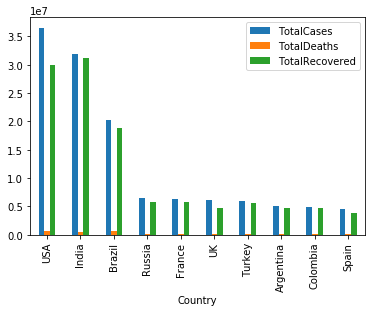

In [24]:
top_ten.plot(kind='bar')

### Find the percentages of infected, recovered and deaths at each country

In [25]:
covid_df['PercentInfected'] = round(covid_df['TotalCases']/covid_df['Population']*100,2)

In [26]:
covid_df['PercentRecovered'] = round(covid_df['TotalRecovered']/covid_df['TotalCases']*100,2)
covid_df['PercentDeaths'] = round(covid_df['TotalDeaths']/covid_df['TotalCases']*100,2)
covid_df.head()


,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalCase1M,Deaths1M,TotalTests,Tests1M,Population,PercentInfected,PercentRecovered,PercentDeaths
8,USA,36519801,632995,29851804,6035002,15723,109624.0,1900.0,543752987,1632228.0,333135490,10.96,81.74,1.73
9,India,31944077,428072,31102724,413281,8944,22901.0,307.0,480039185,344138.0,1394901748,2.29,97.37,1.34
10,Brazil,20151779,563082,18894631,694066,8318,94071.0,2629.0,55034721,256908.0,214219344,9.41,93.76,2.79
11,Russia,6447750,164881,5755507,527362,2300,44162.0,1129.0,169000000,1157508.0,146003287,4.42,89.26,2.56
12,France,6284708,112190,5755540,416978,1510,96049.0,1715.0,108610486,1659890.0,65432324,9.60,91.58,1.79


In [27]:
covid_df['TotalCases'].unique()

array([36519801, 31944077, 20151779,  6447750,  6284708,  6042252,
        5895841,  5012754,  4834634,  4588132,  4396417,  4158729,
        3796299,  3666031,  2964244,  2884098,  2523488,  2259151,
        2124128,  1885805,  1712709,  1674906,  1658916,  1622509,
        1438219,  1353695,  1262540,  1136726,  1104538,  1084919,
        1067580,  1016781,   986967,   898433,   809855,   776178,
         756505,   725702,   723968,   714877,   692964,   687292,
         663082,   634214,   610660,   570098,   533516,   512342,
         491185,   477262,   458219,   454865,   453932,   447913,
         441316,   427873,   416677,   402794,   393040,   389510,
         382360,   365045,   350605,   344151,   329994,   329516,
         323786,   317999,   312115,   310628,   305936,   298706,
         286103,   284641,   283667,   269949,   267846,   260555,
         260109,   232157,   227689,   211828,   210956,   206106,
         205656,   199662,   180356,   177615,   173532,   169

In [28]:
# In order to examine the most effective countries against COVID-19 I will drop the rows where countries have population 
# less than 1M
large_coun_cov = covid_df[~(covid_df['Population']<1000000)]

In [29]:
large_coun_cov.shape

(157, 14)

In [35]:
# I will examine which country has taken the right measures to fight the pandemic 
most_effective = large_coun_cov.groupby('Country')['TotalCases','TotalRecovered','TotalDeaths','PercentInfected','PercentRecovered','PercentDeaths'].sum().sort_values(['PercentInfected','PercentRecovered'],ascending=False).head(10)
most_effective

C:\Users\merts\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,TotalCases,TotalRecovered,TotalDeaths,PercentInfected,PercentRecovered,PercentDeaths
Country,,,,,,
Czechia,1674906,1642165,30363,15.61,98.05,1.81
Bahrain,269949,267526,1384,15.28,99.10,0.51
Slovenia,260109,254222,4433,12.51,97.74,1.70
Georgia,447913,400616,6084,11.25,89.44,1.36
Argentina,5012754,4658028,107302,10.98,92.92,2.14
Netherlands,1885805,1690970,17869,10.98,89.67,0.95
Uruguay,382360,374755,5986,10.97,98.01,1.57
USA,36519801,29851804,632995,10.96,81.74,1.73
Sweden,1104538,1078132,14620,10.86,97.61,1.32


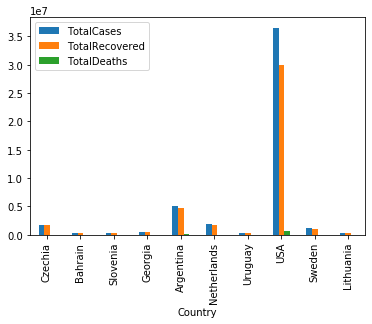

In [36]:
most_effective[['TotalCases','TotalRecovered','TotalDeaths']].plot(kind='bar')